# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Make a datasets

In [5]:
dict1 = {
    'x1' : [5, 2.5, 3, 3.25, 3.5, 3.75],
    'x2' : [7, 5, 9, 8, 3, 5],
    'y' : [1, 0, 1, 1, 0, 1]
}

In [6]:
df = pd.DataFrame(dict1)

In [53]:
df_cpy = df.copy()
df

,x1,x2,y,weight,y_pred,new_weight,Normalized_Weight,Cumsum_Upper,Cumsum_Lower
0,5.00,7,1,0.166667,1,0.074536,0.1,0.1,0.0
1,2.50,5,0,0.166667,0,0.074536,0.1,0.2,0.1
2,3.00,9,1,0.166667,1,0.074536,0.1,0.3,0.2
3,3.25,8,1,0.166667,1,0.074536,0.1,0.4,0.3
4,3.50,3,0,0.166667,0,0.074536,0.1,0.5,0.4
5,3.75,5,1,0.166667,0,0.372678,0.5,1.0,0.5


<Axes: xlabel='x1', ylabel='x2'>

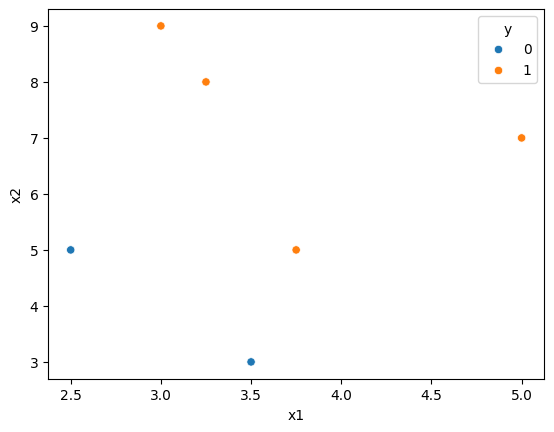

In [11]:
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'y')

# Step 1: Weight Calculate

In [12]:
df['weight'] = 1/df.shape[0]
df

,x1,x2,y,weight
0,5.00,7,1,0.166667
1,2.50,5,0,0.166667
2,3.00,9,1,0.166667
3,3.25,8,1,0.166667
4,3.50,3,0,0.166667
5,3.75,5,1,0.166667


# Step 2 : `First` Split

In [13]:
model1 = DecisionTreeClassifier(max_depth = 1)

In [15]:
X = df[['x1', 'x2']].values
y = df['y'].values

In [16]:
model1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x2 <= 6.0\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.625, 0.5, '  False')]

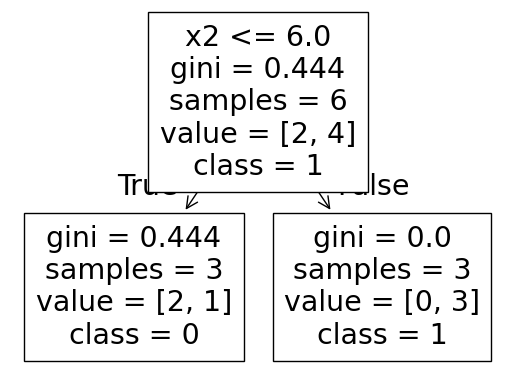

In [18]:
plot_tree(model1, feature_names = ['x1', 'x2'], class_names = ['0', '1'])

<Axes: >

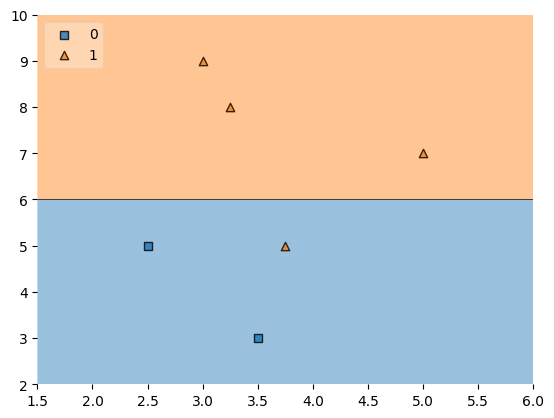

In [20]:
plot_decision_regions(X, y, clf=model1, legend=2)

## Step 2.1 : Prediction Calculation

In [21]:
df['y_pred'] = model1.predict(X)
df

,x1,x2,y,weight,y_pred
0,5.00,7,1,0.166667,1
1,2.50,5,0,0.166667,0
2,3.00,9,1,0.166667,1
3,3.25,8,1,0.166667,1
4,3.50,3,0,0.166667,0
5,3.75,5,1,0.166667,0


# Step 3: Model Weight Calculation

$$
\alpha_m = \frac{1}{2} \ln\left(\frac{1 - \varepsilon_m}{\varepsilon_m}\right)
$$

$
\varepsilon_m = Error
$



## 3.1 Find The Alpha's value

In [22]:
def calculate_alpha(error):
    return 0.5 * np.log((1 - error) / error)

In [33]:
error = df[df['y'] != df['y_pred']]['weight'].sum()
alpha1 = calculate_alpha(error)
error, alpha1

(np.float64(0.16666666666666666), np.float64(0.8047189562170503))

## Step 3.2 : Update Weights

In [38]:
def update_row_weight(row, alpha, y_pred):
    if row['y'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [39]:
df['new_weight'] = df.apply(update_row_weight, axis = 1, args = (alpha1, df['y_pred']))
df

,x1,x2,y,weight,y_pred,new_weight
0,5.00,7,1,0.166667,1,0.074536
1,2.50,5,0,0.166667,0,0.074536
2,3.00,9,1,0.166667,1,0.074536
3,3.25,8,1,0.166667,1,0.074536
4,3.50,3,0,0.166667,0,0.074536
5,3.75,5,1,0.166667,0,0.372678


## Step 3.3 : Normalized Weight

In [40]:
df['Normalized_Weight'] = df['new_weight'] / df['new_weight'].sum()
df

,x1,x2,y,weight,y_pred,new_weight,Normalized_Weight
0,5.00,7,1,0.166667,1,0.074536,0.1
1,2.50,5,0,0.166667,0,0.074536,0.1
2,3.00,9,1,0.166667,1,0.074536,0.1
3,3.25,8,1,0.166667,1,0.074536,0.1
4,3.50,3,0,0.166667,0,0.074536,0.1
5,3.75,5,1,0.166667,0,0.372678,0.5


# Step 4 : Build New Columns

In [43]:
df['Cumsum_Upper'] = np.cumsum(df['Normalized_Weight'])

,x1,x2,y,weight,y_pred,new_weight,Normalized_Weight,Cumsum_Upper
0,5.00,7,1,0.166667,1,0.074536,0.1,0.1
1,2.50,5,0,0.166667,0,0.074536,0.1,0.2
2,3.00,9,1,0.166667,1,0.074536,0.1,0.3
3,3.25,8,1,0.166667,1,0.074536,0.1,0.4
4,3.50,3,0,0.166667,0,0.074536,0.1,0.5
5,3.75,5,1,0.166667,0,0.372678,0.5,1.0


In [45]:
df['Cumsum_Lower'] = df['Cumsum_Upper'] - df['Normalized_Weight']
df

,x1,x2,y,weight,y_pred,new_weight,Normalized_Weight,Cumsum_Upper,Cumsum_Lower
0,5.00,7,1,0.166667,1,0.074536,0.1,0.1,0.0
1,2.50,5,0,0.166667,0,0.074536,0.1,0.2,0.1
2,3.00,9,1,0.166667,1,0.074536,0.1,0.3,0.2
3,3.25,8,1,0.166667,1,0.074536,0.1,0.4,0.3
4,3.50,3,0,0.166667,0,0.074536,0.1,0.5,0.4
5,3.75,5,1,0.166667,0,0.372678,0.5,1.0,0.5


In [46]:
df[['x1','x2','y','weight','y_pred','Normalized_Weight','Cumsum_Lower','Cumsum_Upper']]

,x1,x2,y,weight,y_pred,Normalized_Weight,Cumsum_Lower,Cumsum_Upper
0,5.00,7,1,0.166667,1,0.1,0.0,0.1
1,2.50,5,0,0.166667,0,0.1,0.1,0.2
2,3.00,9,1,0.166667,1,0.1,0.2,0.3
3,3.25,8,1,0.166667,1,0.1,0.3,0.4
4,3.50,3,0,0.166667,0,0.1,0.4,0.5
5,3.75,5,1,0.166667,0,0.5,0.5,1.0


# Step 5 : Create New Datasets

In [49]:
def create_new_datasets(df):
  index_list = []

  for i in range(df.shape[0]):
      a = np.random.random()

      for index,row in df.iterrows():
        if row['Cumsum_Upper'] > a and a > row['Cumsum_Lower']:
          index_list.append(index)

  return index_list

In [50]:
get_index = create_new_datasets(df)
get_index

[5, 1, 1, 0, 5, 5]

In [51]:
second_data = df.loc[get_index]
second_data

,x1,x2,y,weight,y_pred,new_weight,Normalized_Weight,Cumsum_Upper,Cumsum_Lower
5,3.75,5,1,0.166667,0,0.372678,0.5,1.0,0.5
1,2.50,5,0,0.166667,0,0.074536,0.1,0.2,0.1
1,2.50,5,0,0.166667,0,0.074536,0.1,0.2,0.1
0,5.00,7,1,0.166667,1,0.074536,0.1,0.1,0.0
5,3.75,5,1,0.166667,0,0.372678,0.5,1.0,0.5
5,3.75,5,1,0.166667,0,0.372678,0.5,1.0,0.5


# Customized Class

In [52]:
class CustomeAdaBoost:

  def __init__(self) -> None:
     pass

  def fit(self, X, y):
    self.X = X
    self.y = y

    X['weight'] = 1/X.shape[0]
    self.models = []
    self.alphas = []

    for i in range(10):
      model = DecisionTreeClassifier(max_depth = 1)
      model.fit(X[['x1', 'x2']], y)
      X['y_pred'] = model.predict(X[['x1', 'x2']])

      error = X[X['y'] != X['y_pred']]['weight'].sum()
      alpha = self.calculate_alpha(error)

      self.models.append(model)
      self.alphas.append(alpha)

      X['new_weight'] = X.apply(self.update_row_weight, axis = 1, args = (alpha, X['y_pred']))
      X['Normalized_Weight'] = X['new_weight'] / X['new_weight'].sum()

      X['Cumsum_Upper'] = np.cumsum(X['Normalized_Weight'])
      X['Cumsum_Lower'] = X['Cumsum_Upper'] - X['Normalized_Weight']

      get_index = self.create_new_datasets(X)
      X = X.loc[get_index]
    return self




  def calculate_alpha(self, error):
    return 0.5 * np.log((1 - error) / error+0.000001)

  def update_row_weight(self, row, alpha, y_pred):
    if row['y'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)

    else:
        return row['weight'] * np.exp(alpha)

  def create_new_datasets(self, df):
    index_list = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
          if row['Cumsum_Upper'] > a and a > row['Cumsum_Lower']:
            index_list.append(index)
    return index_list

  def predict(self, X):
    pass

In [59]:
dx = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(dx[0], dx[1], test_size=0.33, random_state=42)
ab = CustomeAdaBoost()
ab.fit(X_train, y_train)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [63]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.datasets import make_classification # Import make_classification


class CustomeAdaBoost:

    def __init__(self, n_estimators=10, feature_cols=None, target_col='y'):
        self.n_estimators = n_estimators
        self.feature_cols = feature_cols
        self.target_col = target_col
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        # Convert X and y to pandas DataFrames if they are not already
        if not isinstance(X, pd.DataFrame):
            # Assuming X is a NumPy array with 2 features based on make_classification
            X = pd.DataFrame(X, columns=['x1', 'x2'])
        if not isinstance(y, pd.Series):
            # Assuming y is a NumPy array, convert to Series with the target column name
            y = pd.Series(y, name=self.target_col)

        # Ensure the target column is in the DataFrame
        if self.target_col not in X.columns:
            X[self.target_col] = y

        X['weight'] = 1 / X.shape[0]
        self.models = []
        self.alphas = []
        # Store unique classes for prediction from the Series
        self.classes_ = np.unique(y)

        current_X = X.copy() # Work with a copy for iteration
        current_y = y.copy()

        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)
            features = self.feature_cols if self.feature_cols else [col for col in current_X.columns if col not in [self.target_col, 'weight', 'y_pred', 'new_weight', 'Normalized_Weight', 'Cumsum_Upper', 'Cumsum_Lower']]

            # Ensure the features exist in the current dataframe
            valid_features = [f for f in features if f in current_X.columns]
            if not valid_features:
                 raise ValueError("No valid feature columns found for training.")

            model.fit(current_X[valid_features], current_y)
            current_X['y_pred'] = model.predict(current_X[valid_features])

            # Calculate error using the correct target column name
            error = current_X[current_X[self.target_col] != current_X['y_pred']]['weight'].sum()
            # Handle case where error is 0 to avoid division by zero in alpha calculation
            if error == 0:
                alpha = 1e6 # Assign a large alpha value
            else:
                alpha = self.calculate_alpha(error)


            self.models.append(model)
            self.alphas.append(alpha)

            # Apply update_row_weight function
            current_X['new_weight'] = current_X.apply(self.update_row_weight, axis=1, args=(alpha,)) # Removed y_pred arg
            current_X['Normalized_Weight'] = current_X['new_weight'] / current_X['new_weight'].sum()
            current_X['weight'] = current_X['Normalized_Weight']  # Update weights for the next iteration

            # More efficient resampling using numpy.random.choice
            # Need to sample indices from the current_X index
            cumulative_weights = np.cumsum(current_X['weight'])
            indices = np.random.choice(current_X.index, size=current_X.shape[0], p=current_X['weight'])

            # Select rows based on the sampled indices and reset index
            current_X = current_X.loc[indices].reset_index(drop=True)
            current_y = current_y.loc[indices].reset_index(drop=True)


        return self

    def calculate_alpha(self, error):
        # Added small constant for stability in logarithm
        return 0.5 * np.log((1 - error) / (error + 1e-7))

    def update_row_weight(self, row, alpha):
        # Use the target column name from the class instance
        if row[self.target_col] == row['y_pred']: # Compare with the 'y_pred' column in the row
            return row['weight'] * np.exp(-alpha)
        else:
            return row['weight'] * np.exp(alpha)

    # The create_new_datasets method is no longer needed with numpy.random.choice resampling
    # def create_new_datasets(self, df):
    #     index_list = []
    #     for i in range(df.shape[0]):
    #         a = np.random.random()
    #         for index,row in df.iterrows():
    #             if row['Cumsum_Upper'] > a and a > row['Cumsum_Lower']:
    #                 index_list.append(index)
    #     return index_list

    def predict(self, X):
        # Convert input X to DataFrame if it's a NumPy array
        if not isinstance(X, pd.DataFrame):
             # Assuming X is a NumPy array with 2 features based on make_classification
            X = pd.DataFrame(X, columns=['x1', 'x2'])

        weighted_predictions = {}
        for cls in self.classes_:
            weighted_predictions[cls] = np.zeros(X.shape[0])

        # Determine features for prediction
        # Use the feature columns used during training, or all columns if not specified
        features = self.feature_cols if self.feature_cols else [col for col in X.columns if col not in [self.target_col, 'weight', 'y_pred', 'new_weight', 'Normalized_Weight', 'Cumsum_Upper', 'Cumsum_Lower']]
        # Ensure the features exist in the input dataframe
        valid_features = [f for f in features if f in X.columns]
        if not valid_features:
             raise ValueError("No valid feature columns found for prediction.")


        for i, model in enumerate(self.models):
            y_pred = model.predict(X[valid_features])
            alpha = self.alphas[i]
            for j, pred in enumerate(y_pred):
                # Ensure the predicted class is in the weighted_predictions dictionary
                if pred in weighted_predictions:
                    weighted_predictions[pred][j] += alpha

        # Determine the final prediction based on the maximum weighted prediction for each sample
        # Need to iterate through the samples
        final_predictions = []
        for sample_idx in range(X.shape[0]):
             sample_weighted_predictions = {cls: weighted_predictions[cls][sample_idx] for cls in self.classes_}
             # Find the class with the maximum weighted prediction for this sample
             final_predictions.append(max(sample_weighted_predictions, key=sample_weighted_predictions.get))

        return np.array(final_predictions) # Return as a NumPy array

In [64]:
dx = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(dx[0], dx[1], test_size=0.33, random_state=42)
ab = CustomeAdaBoost()
ab.fit(X_train, y_train)

In [65]:
accuracy_score(ab.predict(X_test), y_test)

0.24848484848484848